## **Objective **
### Social Media Tweet Exploratory Data Analysis (EDA) on Twitter Dataset
#### on Tweets about China and Taiwan Conflict

## Data Understanding
### Loading necessary packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re

##### Data acquisition

In [2]:
#To read csv file and create dataframe
tweets = pd.read_csv('cleaned_tweet_data.csv')
tweets.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2022-08-02 15:02:35+00:00,"<a href=""http://twitter.com/download/android"" ...",#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,Pelosi Taipei taiwanXiJinping China On a verge...,"(0.0, 0.0)",0.00,0.000,en,10841,0,NassimaLilEmy,0,64,47,False,"[{'text': 'Pelosi', 'indices': [0, 7]}, {'text...",[],Algérie,NaN
1,2022-08-04 01:42:24+00:00,"<a href=""http://twitter.com/download/android"" ...",When you're missing her but she's far.\n#Taiwa...,When youre missing her but shes farTaiwanCoupl...,"(-0.05, 0.525)",-0.05,0.525,en,852,0,MukukaReal,0,119,179,False,"[{'text': 'Taiwan', 'indices': [39, 46]}, {'te...",[],Ndola,NaN
2,2022-08-02 14:45:47+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter will make laugh and scared on the #Pel...,Twitter will make laugh and scared on the Pelo...,"(0.3, 0.1)",0.30,0.100,en,30964,0,deusthengo,10,6413,6769,NaN,"[{'text': 'Pelosi', 'indices': [42, 49]}]",[],Lilongwe,NaN
3,2022-08-02 12:53:29+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","@flightradar24 I hope she makes it, otherwise ...",flightradar24 I hope she makes it otherwise it...,"(0.0, 0.0)",0.00,0.000,en,7112,0,bIackdot,5,12,13,NaN,"[{'text': 'WWIII', 'indices': [83, 89]}]","[{'screen_name': 'flightradar24', 'name': 'Fli...",Zambia,NaN
4,2022-08-01 21:18:51+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Who invited Mrs #Pelosi to Taiwan,Who invited Mrs Pelosi to Taiwan,"(0.0, 0.0)",0.00,0.000,en,7112,0,bIackdot,5,12,13,NaN,"[{'text': 'Pelosi', 'indices': [16, 23]}]",[],Zambia,NaN


In [3]:
#To get information abou the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14532 entries, 0 to 14531
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   created_at              14532 non-null  object 
 1   source                  14532 non-null  object 
 2   original_text           14532 non-null  object 
 3   clean_text              14532 non-null  object 
 4   sentiment               14532 non-null  object 
 5   polarity                14532 non-null  float64
 6   subjectivity            14532 non-null  float64
 7   lang                    14532 non-null  object 
 8   favorite_count          14532 non-null  int64  
 9   retweet_count           14532 non-null  int64  
 10  original_author         14532 non-null  object 
 11  screen_count            14532 non-null  int64  
 12  followers_count         14532 non-null  int64  
 13  friends_count           14532 non-null  int64  
 14  possibly_sensitive      10301 non-null

#### Check if there are errors in the data

In [4]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having columns value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 19031
Columons having columns value:Index(['possibly_sensitive', 'place', 'place_coord_boundaries'], dtype='object')


### Data Preparation 

*   Making correction 
*   Reformatting
*   Combining Dataset




In [5]:
tweets_df = pd.DataFrame(columns=['text'])

tweets_df['text'] =  tweets['clean_text'].to_list()


In [6]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,text
0,Pelosi Taipei taiwanXiJinping China On a verge...
1,When youre missing her but shes farTaiwanCoupl...
2,Twitter will make laugh and scared on the Pelo...
3,flightradar24 I hope she makes it otherwise it...
4,Who invited Mrs Pelosi to Taiwan
...,...
14527,Kosovo Serbia the next face of world war three...
14528,The US and China out there in the china sea pl...
14529,Wheels down TaipeiPelosi SPAR19
14530,Final approach to TaipeiPelosi SPAR19


### uni-variate Analysis on Hashtags

In [7]:
re.findall?

In [8]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [9]:
tweets_df["original_text"] = tweets['original_text'].to_list()

In [10]:
# update Hashtag column with hashtags extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.original_text.apply(find_hashtags)
# tweets_df['hashtags'] = [find_hashtags(x) for x in tweets_df['text']
print(tweets_df['hashtags'])

0        [#Pelosi, #Taipei, #taiwan, #XiJinping, #China]
1                                [#Taiwan, #CoupleGoals]
2                                              [#Pelosi]
3                                               [#WWIII]
4                                              [#Pelosi]
                              ...                       
14527                 [#Kosovo, #Serbia, #WWIII, #China]
14528                             [#TaiwanStraitsCrisis]
14529                                 [#Pelosi, #SPAR19]
14530                                 [#Pelosi, #SPAR19]
14531                                          [#Pelosi]
Name: hashtags, Length: 14532, dtype: object


In [11]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [12]:
hashtags_list_df

,hashtags
0,"[#Pelosi, #Taipei, #taiwan, #XiJinping, #China]"
1,"[#Taiwan, #CoupleGoals]"
2,[#Pelosi]
3,[#WWIII]
4,[#Pelosi]
...,...
14527,"[#Kosovo, #Serbia, #WWIII, #China]"
14528,[#TaiwanStraitsCrisis]
14529,"[#Pelosi, #SPAR19]"
14530,"[#Pelosi, #SPAR19]"


In [13]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [14]:
flattened_hashtags_df

,hashtag
0,#Pelosi
1,#Taipei
2,#taiwan
3,#XiJinping
4,#China
...,...
71130,#Pelosi
71131,#SPAR19
71132,#Pelosi
71133,#SPAR19


In [15]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [16]:
tweets_df

,text,original_text,hashtags,flattened_hashtags
0,Pelosi Taipei taiwanXiJinping China On a verge...,#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,"[#Pelosi, #Taipei, #taiwan, #XiJinping, #China]",#Pelosi
1,When youre missing her but shes farTaiwanCoupl...,When you're missing her but she's far.\n#Taiwa...,"[#Taiwan, #CoupleGoals]",#Taipei
2,Twitter will make laugh and scared on the Pelo...,Twitter will make laugh and scared on the #Pel...,[#Pelosi],#taiwan
3,flightradar24 I hope she makes it otherwise it...,"@flightradar24 I hope she makes it, otherwise ...",[#WWIII],#XiJinping
4,Who invited Mrs Pelosi to Taiwan,Who invited Mrs #Pelosi to Taiwan,[#Pelosi],#China
...,...,...,...,...
14527,Kosovo Serbia the next face of world war three...,#Kosovo #Serbia the next face of world war thr...,"[#Kosovo, #Serbia, #WWIII, #China]",#XiJinping
14528,The US and China out there in the china sea pl...,The US and China out there in the china sea pl...,[#TaiwanStraitsCrisis],#mobilegames
14529,Wheels down TaipeiPelosi SPAR19,Wheels down Taipei\n#Pelosi #SPAR19 https://t....,"[#Pelosi, #SPAR19]",#mobilegames
14530,Final approach to TaipeiPelosi SPAR19,Final approach to Taipei\n#Pelosi #SPAR19 http...,"[#Pelosi, #SPAR19]",#apocolleagues


<AxesSubplot:>

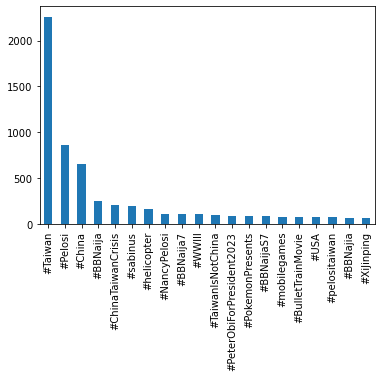

In [17]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')


### Analyzing data using language attribute

In [18]:
#ploting Tweets by language 
tweets_2 = pd.DataFrame(columns=['text','lang'])

tweets_2['text'] =  tweets['clean_text'].to_list()
tweets_2['lang'] =  tweets['lang'].to_list()

tweets_by_lang = tweets['lang'].value_counts()

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

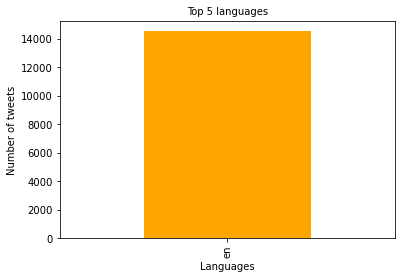

In [19]:
# this data would only have english, since we removed the non-english rows in clean_tweets_dataframe

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')


In [20]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets['lang'] =="en"]

In [21]:
English_tweets

,text,original_text,hashtags,flattened_hashtags
0,Pelosi Taipei taiwanXiJinping China On a verge...,#Pelosi \n#Taipei \n#taiwan\n#XiJinping \n#Chi...,"[#Pelosi, #Taipei, #taiwan, #XiJinping, #China]",#Pelosi
1,When youre missing her but shes farTaiwanCoupl...,When you're missing her but she's far.\n#Taiwa...,"[#Taiwan, #CoupleGoals]",#Taipei
2,Twitter will make laugh and scared on the Pelo...,Twitter will make laugh and scared on the #Pel...,[#Pelosi],#taiwan
3,flightradar24 I hope she makes it otherwise it...,"@flightradar24 I hope she makes it, otherwise ...",[#WWIII],#XiJinping
4,Who invited Mrs Pelosi to Taiwan,Who invited Mrs #Pelosi to Taiwan,[#Pelosi],#China
...,...,...,...,...
14527,Kosovo Serbia the next face of world war three...,#Kosovo #Serbia the next face of world war thr...,"[#Kosovo, #Serbia, #WWIII, #China]",#XiJinping
14528,The US and China out there in the china sea pl...,The US and China out there in the china sea pl...,[#TaiwanStraitsCrisis],#mobilegames
14529,Wheels down TaipeiPelosi SPAR19,Wheels down Taipei\n#Pelosi #SPAR19 https://t....,"[#Pelosi, #SPAR19]",#mobilegames
14530,Final approach to TaipeiPelosi SPAR19,Final approach to Taipei\n#Pelosi #SPAR19 http...,"[#Pelosi, #SPAR19]",#apocolleagues


### Text Preprocessing

In [22]:
#text Preprocessing
English_tweets['text'] = English_tweets['text'].astype(str)
English_tweets['text'] = English_tweets['text'].apply(lambda x: x.lower())
English_tweets['text'] = English_tweets['text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


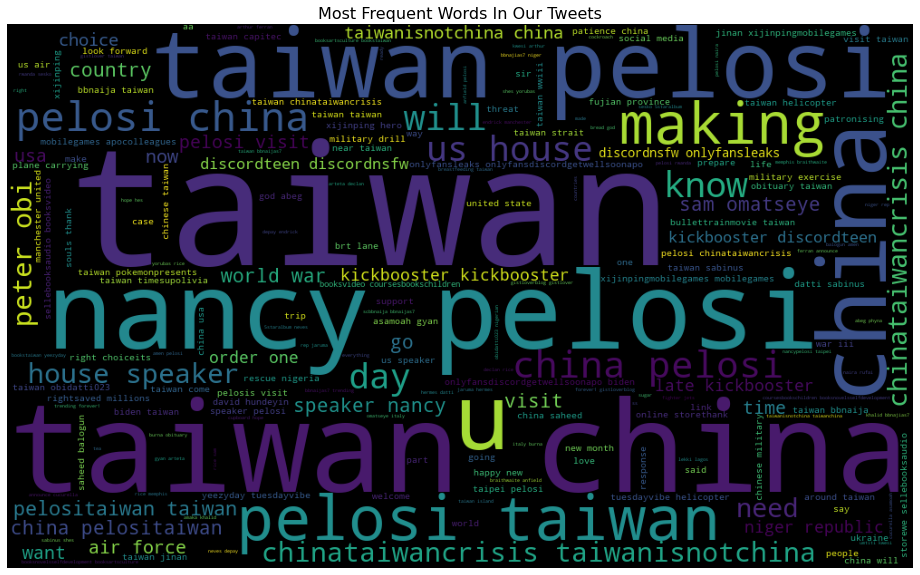

In [23]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

## **Assignment 2 for Practice** 
Add additional Exploratory analysis function to 

*   Find top 10 mentioned names.



In [68]:
a =  tweets['user_mentions'].to_list()
mentions = [one.split(':')[2].split('\'')[1] for one in a if 'name' in one]
# b = [[two.split(':')[2].split('\'')[1] for two in one.split('}')] for one in a if 'name' in one]

In [69]:
# create a dataframe for mentions which is flattened

In [70]:
mentions_df = pd.DataFrame(mentions, columns=['mentions'])

In [71]:
mentions_df

,mentions
0,Flightradar24
1,Reno Omokri
2,Code Monk
3,President Biden
4,YouTube
...,...
3332,Nancy Pelosi
3333,Joe Biden
3334,Disclose.tv
3335,Raffaello Pantucci


In [72]:
#plot by counting the accourance of each name first and then slice the first ten

<AxesSubplot:ylabel='mentions'>

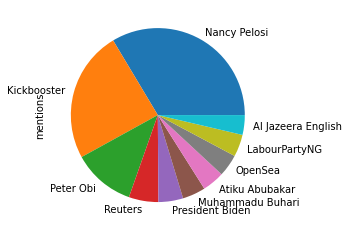

In [73]:
mentions_df['mentions'].value_counts()[:10].plot(kind='pie')

<AxesSubplot:>

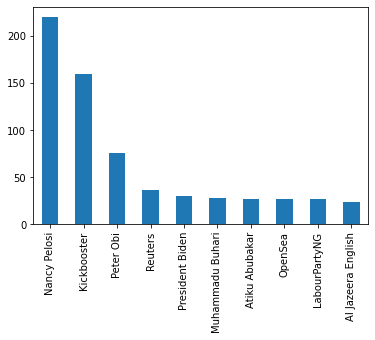

In [74]:
mentions_df['mentions'].value_counts()[:10].plot(kind='bar')

<AxesSubplot:>

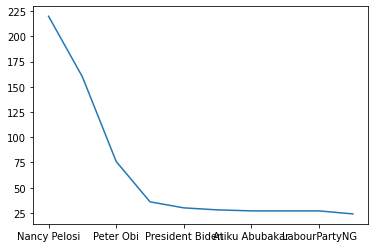

In [75]:
mentions_df['mentions'].value_counts()[:10].plot(kind='line')

Here we cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a tweets/document.

This can be done by assigning each word a unique number. Then any tweet we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

In [26]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['pelosi',
  'taipei',
  'taiwanxijinping',
  'china',
  'on',
  'a',
  'verge',
  'of',
  'another',
  'war'],
 ['when', 'youre', 'missing', 'her', 'but', 'shes', 'fartaiwancouplegoals']]

In [28]:
#Create dictionary which contains Id and word 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ a
1 ........ another
2 ........ china
3 ........ of
4 ........ on
5 ........ pelosi
6 ........ taipei
7 ........ taiwanxijinping
8 ........ verge
9 ........ war
10 ........ but
11 ........ fartaiwancouplegoals
12 ........ her
13 ........ missing
14 ........ shes
15 ........ when
16 ........ youre
17 ........ and
18 ........ laugh
19 ........ make
20 ........ scared
21 ........ taiwan
22 ........ the
23 ........ twitter
24 ........ visit
25 ........ will
26 ........ be
27 ........ flightradar24
28 ........ hope
29 ........ i
30 ........ it
31 ........ makes
32 ........ official
33 ........ otherwise
34 ........ she
35 ........ start
36 ........ wwiii
37 ........ invited
38 ........ mrs
39 ........ to
40 ........ who
41 ........ about
42 ........ amp
43 ........ facebook
44 ........ have
45 ........ instagram
46 ........ is
47 ........ nothing
48 ........ there
49 ........ tiktokww3
50 ........ we
51 ........ worry
52 ........ grave
53 ........ mistakepelosi
54 ........ nancyp

653 ........ programming
654 ........ reactjs
655 ........ rstats
656 ........ serverless
657 ........ sql
658 ........ texteditor
659 ........ tips
660 ........ whats
661 ........ biz
662 ........ game
663 ........ startpython
664 ........ youd
665 ........ behind
666 ........ brains
667 ........ chart
668 ........ chelseafc
669 ........ crypto
670 ........ cryptocurrencies
671 ........ currency
672 ........ didnt
673 ........ ecosystem
674 ........ intuitively
675 ........ key
676 ........ outits
677 ........ pi
678 ........ pioneer
679 ........ pity
680 ........ playing
681 ........ seen
682 ........ success
683 ........ thats
684 ........ top
685 ........ accessible
686 ........ appropriate
687 ........ database
688 ........ e4c
689 ........ environmentsdavido
690 ........ intended
691 ........ library
692 ........ living
693 ........ peterobiforpresident2023
694 ........ products
695 ........ resourceconstrained
696 ........ services
697 ........ solutions
698 ........ those
699 .

1247 ........ mind
1248 ........ ooo
1249 ........ owner
1250 ........ unfollow
1251 ........ bigbrother24
1252 ........ deborah
1253 ........ doing
1254 ........ hurt
1255 ........ notice
1256 ........ past
1257 ........ talking
1258 ........ choir
1259 ........ choral
1260 ........ copyright
1261 ........ musicallyampvocallytaiwan
1262 ........ non
1263 ........ performancesampeffectiveness
1264 ........ singersmusicians
1265 ........ singersmusiciansthe
1266 ........ songwriters
1267 ........ songwritersampnon
1268 ........ confirmed
1269 ........ fabrizioromano
1270 ........ fear
1271 ........ manasuu
1272 ........ marriage
1273 ........ ready
1274 ........ real
1275 ........ relationship
1276 ........ advise
1277 ........ anymore
1278 ........ app
1279 ........ bidenhascancer
1280 ........ breakingnews
1281 ........ delay
1282 ........ eajor
1283 ........ eajorng
1284 ........ kind
1285 ........ last
1286 ........ money
1287 ........ pay
1288 ........ should
1289 ........ since
12

1872 ........ future
1873 ........ mara
1874 ........ receive
1875 ........ registrationtaiwan
1876 ........ rewards
1877 ........ sign
1878 ........ successful
1879 ........ thailand
1880 ........ twice
1881 ........ tzuyuedit
1882 ........ usd
1883 ........ waitlist
1884 ........ wallet
1885 ........ wallet2
1886 ........ soup
1887 ........ akpan
1888 ........ b2022netball
1889 ........ credit
1890 ........ faster
1891 ........ frank
1892 ........ laptop
1893 ........ mompha
1894 ........ tiktokus
1895 ........ zainab
1896 ........ breaking
1897 ........ fires
1898 ........ nancypelositaiwanvisit
1899 ........ near
1900 ........ 5951
1901 ........ abeokuta
1902 ........ arewa
1903 ........ bureau
1904 ........ conscienceapc
1905 ........ dollar
1906 ........ finebut
1907 ........ friend
1908 ........ happy
1909 ........ itoku
1910 ........ n595are
1911 ........ naira
1912 ........ shall
1913 ........ succeedarisetvsabinustaiwan
1914 ........ tinubushettima
1915 ........ alone
1916 ..

2488 ........ price2500nationwide
2489 ........ quantity
2490 ........ souvenir
2491 ........ wholesale
2492 ........ budget
2493 ........ federal
2494 ........ governments
2495 ........ justifies
2496 ........ national
2497 ........ planning
2498 ........ purchase
2499 ........ suv
2500 ........ vehicles
2501 ........ beintentional
2502 ........ championspersonaldevelopment
2503 ........ food
2504 ........ bark
2505 ........ beachgoers
2506 ........ bluff
2507 ........ citizens
2508 ........ endanger
2509 ........ exposed
2510 ........ humiliated
2511 ........ lives
2512 ........ nearbychinataiwancrisis
2513 ........ toothlessly
2514 ........ utterly
2515 ........ access
2516 ........ among
2517 ........ gwheri
2518 ........ hiv
2519 ........ hivoswil
2520 ........ inability
2521 ........ increase
2522 ........ lack
2523 ........ negotiate
2524 ........ reproductive
2525 ........ safe
2526 ........ sex
2527 ........ sexual
2528 ........ sexworkiswork
2529 ........ violence
2530 ......

3110 ........ renewal
3111 ........ reported
3112 ........ solving
3113 ........ stakeholder
3114 ........ vanguardngrnewstaiwan
3115 ........ ebubeagumustgo
3116 ........ earn
3117 ........ film
3118 ........ subtitle
3119 ........ afrobeatradio
3120 ........ applemusic
3121 ........ applemusicnigeria
3122 ........ audiomack
3123 ........ bullettrainmovieterminal21korat
3124 ........ californiaadventure
3125 ........ distrokid
3126 ........ itunes
3127 ........ newyorkcity
3128 ........ spotifyplaylist
3129 ........ spotifyterminator
3130 ........ terminator
3131 ........ bullettrainmoviewebsite
3132 ........ cryptonewstaiwan
3133 ........ demo
3134 ........ epic
3135 ........ nownftgiveaways
3136 ........ p2egamingfans
3137 ........ promises
3138 ........ warpbond
3139 ........ whitelistspot
3140 ........ wl
3141 ........ betsmastersprotaiwan
3142 ........ impressive
3143 ........ jobthank
3144 ........ kovacic
3145 ........ mamadollarz
3146 ........ osimhem
3147 ........ peterdrury


3708 ........ 150magency
3709 ........ 1price
3710 ........ 55mcontact
3711 ........ bedroom
3712 ........ bq
3713 ........ kalid
3714 ........ location
3715 ........ phase
3716 ........ phyna
3717 ........ rccgconvention
3718 ........ rctid
3719 ........ sheggzfc
3720 ........ terrace
3721 ........ townhouse
3722 ........ could
3723 ........ ends
3724 ........ expression
3725 ........ hifyqouteslovequotes
3726 ........ rumi
3727 ........ smile
3728 ........ suhaib
3729 ........ wars
3730 ........ anyone
3731 ........ bbn
3732 ........ invaded
3733 ........ passport
3734 ........ passports
3735 ........ submitted
3736 ........ ukrainian
3737 ........ ukrinnga
3738 ........ hotjistnaija
3739 ........ kill
3740 ........ lautech
3741 ........ protest
3742 ........ studenthotjist
3743 ........ apeteofafrika
3744 ........ dril
3745 ........ monthtaiwan
3746 ........ petermj
3747 ........ rap
3748 ........ countryhotjist
3749 ........ cps
3750 ........ igp
3751 ........ ronldo
3752 ........ 

4317 ........ redvelvet
4318 ........ strength
4319 ........ surprise
4320 ........ apathy
4321 ........ candidatearise
4322 ........ character
4323 ........ compatriots2023elections
4324 ........ competent
4325 ........ societyi
4326 ........ distract
4327 ........ distracted
4328 ........ ended
4329 ........ foolishly
4330 ........ saraki
4331 ........ tsunami
4332 ........ 2naira
4333 ........ asaba
4334 ........ beautywithbrains
4335 ........ caterefe
4336 ........ cheap
4337 ........ ebubeagu
4338 ........ jubril
4339 ........ limosiris
4340 ........ nnpc
4341 ........ obituaries
4342 ........ shameless
4343 ........ shes40
4344 ........ welcometochelsea
4345 ........ chair
4346 ........ designed
4347 ........ girlfriend
4348 ........ museum
4349 ........ this2naira
4350 ........ afford
4351 ........ ooooo
4352 ........ presidentpelosi
4353 ........ wisely
4354 ........ influence
4355 ........ wonderwoman
4356 ........ carterefe
4357 ........ festivals
4358 ........ goodmorninglet

4998 ........ goalstom
4999 ........ zendaya
5000 ........ headlines
5001 ........ 114as
5002 ........ againmr
5003 ........ conformed
5004 ........ geawwiii
5005 ........ ignorancein
5006 ........ obedient
5007 ........ obide
5008 ........ passionate
5009 ........ passions
5010 ........ tins
5011 ........ assumption
5012 ........ duo
5013 ........ honestly
5014 ........ impressed
5015 ........ kamalaharris
5016 ........ karenbassla
5017 ........ prayed
5018 ........ goingtaiwan
5019 ........ ahene
5020 ........ cbcinchypesclementafreh
5021 ........ eugenezuta
5022 ........ hene
5023 ........ hisvessel
5024 ........ maiden
5025 ........ mu
5026 ........ newsnanaaddookyere
5027 ........ renato
5028 ........ sanches
5029 ........ shaw
5030 ........ erected
5031 ........ morethe
5032 ........ overworld
5033 ........ structure
5034 ........ collecting
5035 ........ posters
5036 ........ supporters
5037 ........ bed
5038 ........ cries
5039 ........ criestaiwan
5040 ........ crushingjobs
50

5641 ........ adukwei
5642 ........ akufoaddo
5643 ........ allocated
5644 ........ chinajoe
5645 ........ fails
5646 ........ fraudulently
5647 ........ ghs
5648 ........ investigate
5649 ........ investigated
5650 ........ jean
5651 ........ landswwiii
5652 ........ mensa
5653 ........ princesses
5654 ........ prosecutor
5655 ........ soundedpelosi
5656 ........ authorized
5657 ........ escorting
5658 ........ interference
5659 ........ theseus
5660 ........ blue
5661 ........ deepest
5662 ........ desperately
5663 ........ devil
5664 ........ hoping
5665 ........ presence
5666 ........ seawwiii
5667 ........ shine
5668 ........ supported
5669 ........ brewing
5670 ........ independencechina
5671 ........ perish
5672 ........ proceeds
5673 ........ scheduled
5674 ........ worse
5675 ........ flight
5676 ........ landpelosi
5677 ........ audible
5678 ........ departed
5679 ........ fujianpelosi
5680 ........ sounds
5681 ........ zhangzhou
5682 ........ dancing
5683 ........ followlike

6239 ........ kept
6240 ........ sponsors
6241 ........ terror
6242 ........ testing
6243 ........ worlds
6244 ........ cryptorusputin
6245 ........ era
6246 ........ madness
6247 ........ www3
6248 ........ malaysia
6249 ........ 1k
6250 ........ devilobidatti023
6251 ........ endorse
6252 ........ honour
6253 ........ learnt
6254 ........ n10
6255 ........ rejects
6256 ........ reputation
6257 ........ sold
6258 ........ veterans
6259 ........ weuro2022peterobi4president2023
6260 ........ ijn
6261 ........ momentum
6262 ........ n190
6263 ........ n545
6264 ........ n710
6265 ........ pushes
6266 ........ taiwanbbnajia
6267 ........ 1stofaugust
6268 ........ 2022chrisevans
6269 ........ 2nd
6270 ........ tuesdaymotivations
6271 ........ tuesdaythoughts
6272 ........ anecessitycrypto
6273 ........ bank
6274 ........ dgispr
6275 ........ necessarysoon
6276 ........ clubedify
6277 ........ edifycity
6278 ........ julydump
6279 ........ lifemovienight
6280 ........ riseabove
6281 .......

6910 ........ broker
6911 ........ properties
6912 ........ realestateinvesting
6913 ........ reits
6914 ........ sites
6915 ........ stockthis
6916 ........ faint
6917 ........ ought
6918 ........ answerdaily
6919 ........ dailymotivation
6920 ........ dailythoughts
6921 ........ sundaygame
6922 ........ halland
6923 ........ personwanchop
6924 ........ thisbbnaijaguinnesssmooth
6925 ........ watin
6926 ........ 2740
6927 ........ attainable
6928 ........ seem
6929 ........ unattainable
6930 ........ vinfi
6931 ........ woodylightyearx
6932 ........ yearat
6933 ........ cute
6934 ........ feeling
6935 ........ 12c
6936 ........ linkoracle
6937 ........ playlist
6938 ........ playlistoracle
6939 ........ summerslamtaiwanearthquakelollapaloozacommunityshieldunitedshowbizzeenunewthree
6940 ........ videosaccess
6941 ........ alivecarterefe
6942 ........ garciabenavidez
6943 ........ mapp
6944 ........ mappedout
6945 ........ mastablade
6946 ........ platforms
6947 ........ truest
6948 ..

7403 ........ looks
7404 ........ xijinpingthepooh
7405 ........ xipooh
7406 ........ chipstech
7407 ........ imposed
7408 ........ natural
7409 ........ sand
7410 ........ struggle
7411 ........ supplier
7412 ........ suspended
7413 ........ vendafidelitytaiwanlimpopovendaheistmoneymoneyheistsolphendukatembisastage2
7414 ........ chinataiwanchinataiwancrisischinataiwanwarpelosipelosivisitchina
7415 ........ jazeera
7416 ........ booking
7417 ........ bookingcom
7418 ........ grootman
7419 ........ mamkhize
7420 ........ pathetic
7421 ........ sbahle
7422 ........ 00000
7423 ........ 18
7424 ........ 27august
7425 ........ 35
7426 ........ accumulated
7427 ........ biannully
7428 ........ fund
7429 ........ guarantees
7430 ........ minimum
7431 ........ mzansi
7432 ........ r
7433 ........ todaytaiwansenzomeyiwatrial
7434 ........ ampfm
7435 ........ councilor
7436 ........ text
7437 ........ angola
7438 ........ angolas
7439 ........ archives
7440 ........ born
7441 ........ jonas
744

8059 ........ consultative
8060 ........ cppccon
8061 ........ statement
8062 ........ interactive
8063 ........ storytelling
8064 ........ ethipia
8065 ........ promotion
8066 ........ filmio
8067 ........ harlem
8068 ........ iff
8069 ........ kanikadhillon
8070 ........ nftgiveaways
8071 ........ rhoa
8072 ........ sendendahaguezel
8073 ........ eerie
8074 ........ similarities
8075 ........ spectators
8076 ........ yesterdaythere
8077 ........ 21th
8078 ........ divided
8079 ........ fashioned
8080 ........ intervention
8081 ........ protection
8082 ........ ruled
8083 ........ violate
8084 ........ democracybe
8085 ........ interventionbe
8086 ........ policybe
8087 ........ endorsing
8088 ........ gaslighting
8089 ........ nomore
8090 ........ prolonged
8091 ........ ukranian
8092 ........ enters
8093 ........ indopacific
8094 ........ urgent
8095 ........ whitehouse
8096 ........ commitment
8097 ........ delegations
8098 ........ democracyspeakerpelosi
8099 ........ honors
8100 

8769 ........ lisarmorina
8770 ........ lsenews
8771 ........ abdulj07
8772 ........ scholarcorner
8773 ........ viviantie
8774 ........ britchamid
8775 ........ jamaticulus
8776 ........ ukrainewar
8777 ........ 117784keystourstz
8778 ........ 255
8779 ........ 757
8780 ........ bookings
8781 ........ caldera
8782 ........ crater
8783 ........ enquiriesemail
8784 ........ infokeystourscom
8785 ........ ngorongoro
8786 ........ ngorongorocrater
8787 ........ usfor
8788 ........ bna812
8789 ........ seconds
8790 ........ electedkisumu
8791 ........ activitiestravel
8792 ........ email
8793 ........ gorillas
8794 ........ infomakariosafariscomits
8795 ........ naturephotography
8796 ........ park
8797 ........ rwandaagrishow2022
8798 ........ travellers
8799 ........ trek
8800 ........ volcanoes
8801 ........ cheerled
8802 ........ differences
8803 ........ diplomatically
8804 ........ loose
8805 ........ refrain
8806 ........ sort
8807 ........ bomasofkenya
8808 ........ idipsoschainata

9165 ........ decayed
9166 ........ manslaughter
9167 ........ wantingalqaeda
9168 ........ eua
9169 ........ board
9170 ........ ratchets
9171 ........ hermesiyele
9172 ........ llllet
9173 ........ twitterdontpayuk
9174 ........ pushed
9175 ........ teampelosi
9176 ........ android
9177 ........ nyanza
9178 ........ railaamoloodinga
9179 ........ shameonyou
9180 ........ thepremierleague
9181 ........ pelosius
9182 ........ refreshing
9183 ........ endless
9184 ........ pelos
9185 ........ uneccesaray
9186 ........ bbcbreaking
9187 ........ hearing
9188 ........ nancypelosy
9189 ........ chickened
9190 ........ listing
9191 ........ satisfied
9192 ........ airbnbkenya
9193 ........ availablekshs2999nightkiambu
9194 ........ road0715677778tuinuane
9195 ........ studio
9196 ........ resolve
9197 ........ thepandastrikes
9198 ........ weaklings
9199 ........ wartaiwanstraitscrisis
9200 ........ culprit
9201 ........ unclesam
9202 ........ usual
9203 ........ humiliation
9204 ........ ch

9770 ........ expense
9771 ........ occupation
9772 ........ 235
9773 ........ lgbtiqa
9774 ........ mil
9775 ........ murder
9776 ........ noble
9777 ........ offends
9778 ........ religion
9779 ........ taiwanesechinese
9780 ........ trampling
9781 ........ uighur
9782 ........ strongly
9783 ........ expects
9784 ........ 3minutearabic
9785 ........ assalamoalikom
9786 ........ learnarabiclanguage
9787 ........ updated
9788 ........ quotes
9789 ........ curbs
9790 ........ blaming
9791 ........ putinby
9792 ........ vladimir
9793 ........ jingjingli
9794 ........ li
9795 ........ lockdown
9796 ........ 39taiwanpelosichinacuteasroma
9797 ........ totis
9798 ........ uclat
9799 ........ discussed
9800 ........ shared
9801 ........ criticized
9802 ........ alternative
9803 ........ citing
9804 ........ zones
9805 ........ cairotoptours
9806 ........ goodvibes
9807 ........ keopscairo
9808 ........ latina
9809 ........ latino
9810 ........ mytravelgram
9811 ........ photooftheday
9812 ..

10474 ........ newssome
10475 ........ ongoing
10476 ........ cardinal
10477 ........ integral
10478 ........ mutsvangwa
10479 ........ postulate
10480 ........ weighs
10481 ........ zanupfofficial
10482 ........ mocked
10483 ........ focal
10484 ........ geostrategic
10485 ........ playersmore
10486 ........ antinancy
10487 ........ billboards
10488 ........ hacked
10489 ........ visitmore
10490 ........ illegitimate
10491 ........ decries
10492 ........ againchina
10493 ........ newschinas
10494 ........ siren
10495 ........ commodities
10496 ........ critical
10497 ........ negative
10498 ........ negativelythey
10499 ........ problemus
10500 ........ sensitive
10501 ........ taiwanrumorsofwars
10502 ........ background
10503 ........ banamicro
10504 ........ kaohsiung
10505 ........ rivervisittaiwan
10506 ........ takao
10507 ........ rumors
10508 ........ taiwanstraitscrisi
10509 ........ taoyuan
10510 ........ armyprotecting
10511 ........ homeland
10512 ........ seeking
10513 ..

11023 ........ correspondent
11024 ........ gilchrist
11025 ........ interviews
11026 ........ moloto
11027 ........ taiwanrefilwe
11028 ........ poking
11029 ........ uspolitics
11030 ........ wasnt
11031 ........ edris
11032 ........ motivationalquotes
11033 ........ quoteoftheday
11034 ........ wifi
11035 ........ eswatiniprotests
11036 ........ humilitytaiwan
11037 ........ amilcarcabraltaiwan
11038 ........ victories
11039 ........ cbd
11040 ........ generallydonkey
11041 ........ jhb
11042 ........ leaderssolphenduka
11043 ........ massesman
11044 ........ itmpofu
11045 ........ rank
11046 ........ blackpinkkpop
11047 ........ digitalart
11048 ........ knysna
11049 ........ plettenbergbay
11050 ........ capitalists
11051 ........ dominated
11052 ........ drastically
11053 ........ inequality
11054 ........ neoliberal
11055 ........ reduced
11056 ........ theory
11057 ........ controversy
11058 ........ davies
11059 ........ elaborateswatch
11060 ........ martyn
11061 ........ md


11663 ........ pak
11664 ........ qayeda
11665 ........ resulted
11666 ........ rupees
11667 ........ ssehbai1
11668 ........ taipeimfachina
11669 ........ correctness
11670 ........ economically
11671 ........ intentions
11672 ........ militarily
11673 ........ moscows
11674 ........ proved
11675 ........ rapprochement
11676 ........ affecteds
11677 ........ aid
11678 ........ baitussalam
11679 ........ balochistandonate
11680 ........ balochistanflood
11681 ........ donating
11682 ........ floodaffectees
11683 ........ floodaid
11684 ........ floodrelief
11685 ........ modest
11686 ........ reached
11687 ........ recent
11688 ........ handles
11689 ........ jhdi
11690 ........ pissam
11691 ........ drillsclick
11692 ........ stops
11693 ........ surrounds
11694 ........ elephant
11695 ........ infuriate
11696 ........ appdevelopers
11697 ........ bejing
11698 ........ businessconnect
11699 ........ mobileappdevelopment
11700 ........ multi
11701 ........ startup
11702 ........ vendor

12195 ........ overbought
12196 ........ rsi
12197 ........ slightly
12198 ........ sp500
12199 ........ suggests
12200 ........ liaoning
12201 ........ qingdao
12202 ........ 930its
12203 ........ makin
12204 ........ roundtrip
12205 ........ actionschina
12206 ........ 5china
12207 ........ goin
12208 ........ boardtaiwan
12209 ........ kuala
12210 ........ lumpur
12211 ........ militaryconvoys
12212 ........ 100000
12213 ........ flightradar24china
12214 ........ kualalumpur
12215 ........ tracks
12216 ........ undisclosed
12217 ........ responsibilityif
12218 ........ responsibly
12219 ........ noticeablyusa
12220 ........ slump
12221 ........ adventureplanet
12222 ........ bashing
12223 ........ belly
12224 ........ camel
12225 ........ desert
12226 ........ dubaidesertsafarigroup
12227 ........ dune
12228 ........ moreuae
12229 ........ sandboarding
12230 ........ tanura
12231 ........ mounted
12232 ........ tuesdaytim
12233 ........ confident
12234 ........ defeating
12235 .....

In [29]:
corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list]

In [30]:
corpus_1[20:30]

[[(2, 2),
  (3, 1),
  (10, 1),
  (17, 1),
  (21, 1),
  (22, 3),
  (39, 1),
  (46, 1),
  (58, 1),
  (59, 2),
  (67, 2),
  (70, 1),
  (77, 1),
  (82, 1),
  (90, 1),
  (92, 1),
  (248, 1),
  (249, 1),
  (250, 1),
  (251, 1),
  (252, 1),
  (253, 1),
  (254, 1),
  (255, 1),
  (256, 1),
  (257, 1),
  (258, 1),
  (259, 1),
  (260, 1),
  (261, 1),
  (262, 1),
  (263, 1),
  (264, 1),
  (265, 1),
  (266, 1)],
 [(3, 2),
  (17, 2),
  (70, 2),
  (162, 1),
  (268, 1),
  (269, 1),
  (270, 1),
  (271, 1),
  (272, 2),
  (273, 1),
  (274, 1),
  (275, 1),
  (276, 1),
  (277, 1),
  (278, 1),
  (279, 1),
  (280, 1),
  (281, 1),
  (282, 1),
  (283, 1),
  (284, 2),
  (285, 1),
  (286, 1),
  (287, 1),
  (288, 1)],
 [(4, 1),
  (21, 1),
  (22, 1),
  (46, 1),
  (70, 1),
  (121, 1),
  (200, 1),
  (289, 1),
  (290, 1),
  (291, 1),
  (292, 2),
  (293, 1),
  (294, 1),
  (295, 1),
  (296, 1),
  (297, 1),
  (298, 1),
  (299, 1),
  (300, 1),
  (301, 1),
  (302, 1),
  (303, 1),
  (304, 1)],
 [(0, 3),
  (2, 1),
  (5, 1),

### Modeling